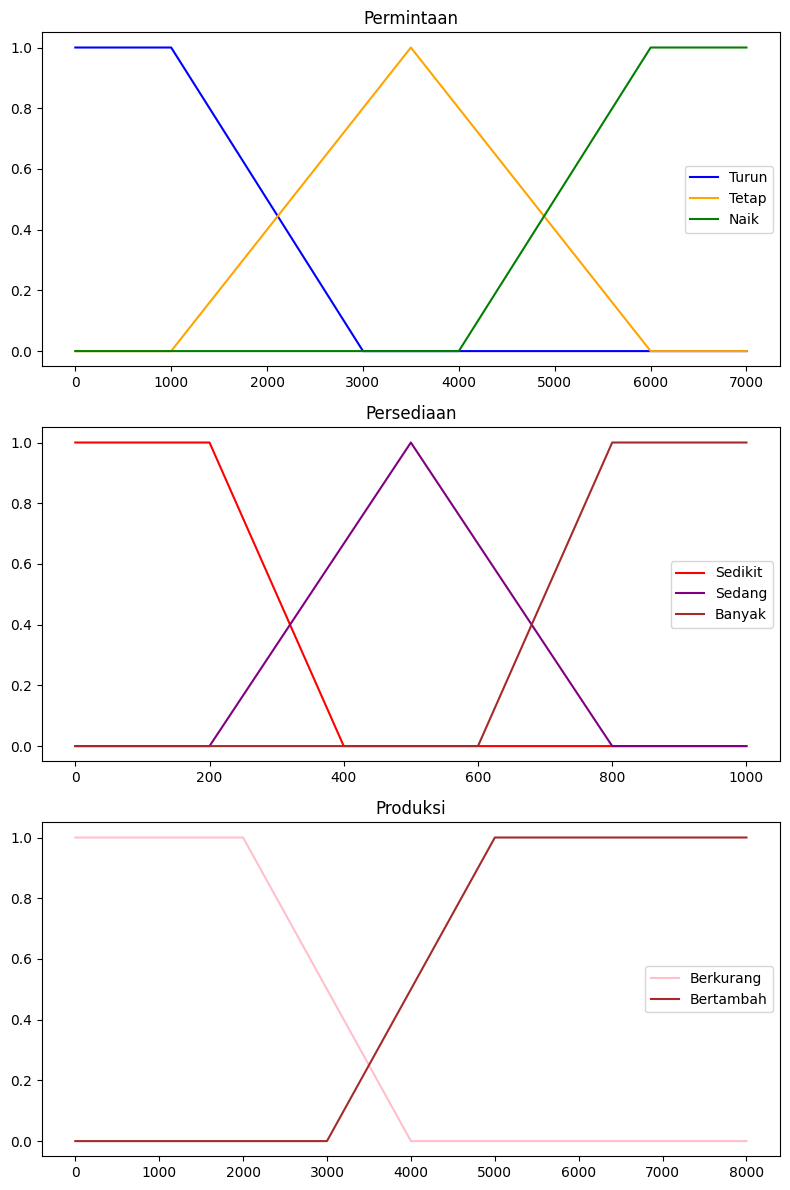

Hasil defuzzifikasi produksi: 5500.50


In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Membership Functions
# Permintaan: turun, tetap, naik
x_permintaan = np.arange(0, 7001, 1)
permintaan_turun = fuzz.trapmf(x_permintaan, [0, 0, 1000, 3000])
permintaan_tetap = fuzz.trimf(x_permintaan, [1000, 3500, 6000])
permintaan_naik = fuzz.trapmf(x_permintaan, [4000, 6000, 7000, 7000])

# Persediaan: sedikit, sedang, banyak
x_persediaan = np.arange(0, 1001, 1)
persediaan_sedikit = fuzz.trapmf(x_persediaan, [0, 0, 200, 400])
persediaan_sedang = fuzz.trimf(x_persediaan, [200, 500, 800])
persediaan_banyak = fuzz.trapmf(x_persediaan, [600, 800, 1000, 1000])

# Produksi: berkurang, bertambah
x_produksi = np.arange(0, 8001, 1)
produksi_berkurang = fuzz.trapmf(x_produksi, [0, 0, 2000, 4000])
produksi_bertambah = fuzz.trapmf(x_produksi, [3000, 5000, 8000, 8000])

# Visualisasi Membership Functions
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 12))

ax1.plot(x_permintaan, permintaan_turun, 'b', label='Turun')
ax1.plot(x_permintaan, permintaan_tetap, 'orange', label='Tetap')
ax1.plot(x_permintaan, permintaan_naik, 'g', label='Naik')
ax1.set_title('Permintaan')
ax1.legend()

ax2.plot(x_persediaan, persediaan_sedikit, 'r', label='Sedikit')
ax2.plot(x_persediaan, persediaan_sedang, 'purple', label='Sedang')
ax2.plot(x_persediaan, persediaan_banyak, 'brown', label='Banyak')
ax2.set_title('Persediaan')
ax2.legend()

ax3.plot(x_produksi, produksi_berkurang, 'pink', label='Berkurang')
ax3.plot(x_produksi, produksi_bertambah, 'brown', label='Bertambah')
ax3.set_title('Produksi')
ax3.legend()

plt.tight_layout()
plt.show()

# 2. Fuzzy Inference System (FIS)
def fuzzy_inference(permintaan, persediaan):
    # Fuzzifikasi
    permintaan_level = {
        'turun': fuzz.interp_membership(x_permintaan, permintaan_turun, permintaan),
        'tetap': fuzz.interp_membership(x_permintaan, permintaan_tetap, permintaan),
        'naik': fuzz.interp_membership(x_permintaan, permintaan_naik, permintaan),
    }
    
    persediaan_level = {
        'sedikit': fuzz.interp_membership(x_persediaan, persediaan_sedikit, persediaan),
        'sedang': fuzz.interp_membership(x_persediaan, persediaan_sedang, persediaan),
        'banyak': fuzz.interp_membership(x_persediaan, persediaan_banyak, persediaan),
    }

    # Inferensi dan aturan
    rules = []
    
    # Contoh aturan: Jika permintaan turun dan persediaan sedikit maka produksi bertambah
    rules.append((
        min(permintaan_level['turun'], persediaan_level['sedikit']),
        'bertambah'
    ))
    
    # Tambahkan semua aturan lainnya dari soal di sini...

    # Agregasi hasil
    produksi_level = {'berkurang': 0, 'bertambah': 0}
    for rule_strength, produksi_type in rules:
        produksi_level[produksi_type] = max(produksi_level[produksi_type], rule_strength)

    # Defuzzifikasi (Tsukamoto)
    numerator = (produksi_level['berkurang'] * np.mean(x_produksi[produksi_berkurang > 0])) + \
                (produksi_level['bertambah'] * np.mean(x_produksi[produksi_bertambah > 0]))
    denominator = produksi_level['berkurang'] + produksi_level['bertambah']

    produksi_defuzz = numerator / denominator if denominator != 0 else 0
    return produksi_defuzz

# Contoh Input dan Output
permintaan = 2000
persediaan = 300
produksi = fuzzy_inference(permintaan, persediaan)
print(f"Hasil defuzzifikasi produksi: {produksi:.2f}")
